In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Análisis ECG Basal en reposo

In [ ]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab4\Basal reposo 3.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
ecg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(ecg_raw)
t = np.arange(N) / fs

In [ ]:
# Denoising / Filtrado

# a) Quitar DC (media)
ecg_dc = ecg_raw - np.mean(ecg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
ecg_notch = signal.filtfilt(b_notch, a_notch, ecg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
ecg_filtered = signal.filtfilt(b_band, a_band, ecg_notch)


In [ ]:
# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(ecg_raw, fs)
freqs_filt, fft_filt = compute_fft(ecg_filtered, fs)


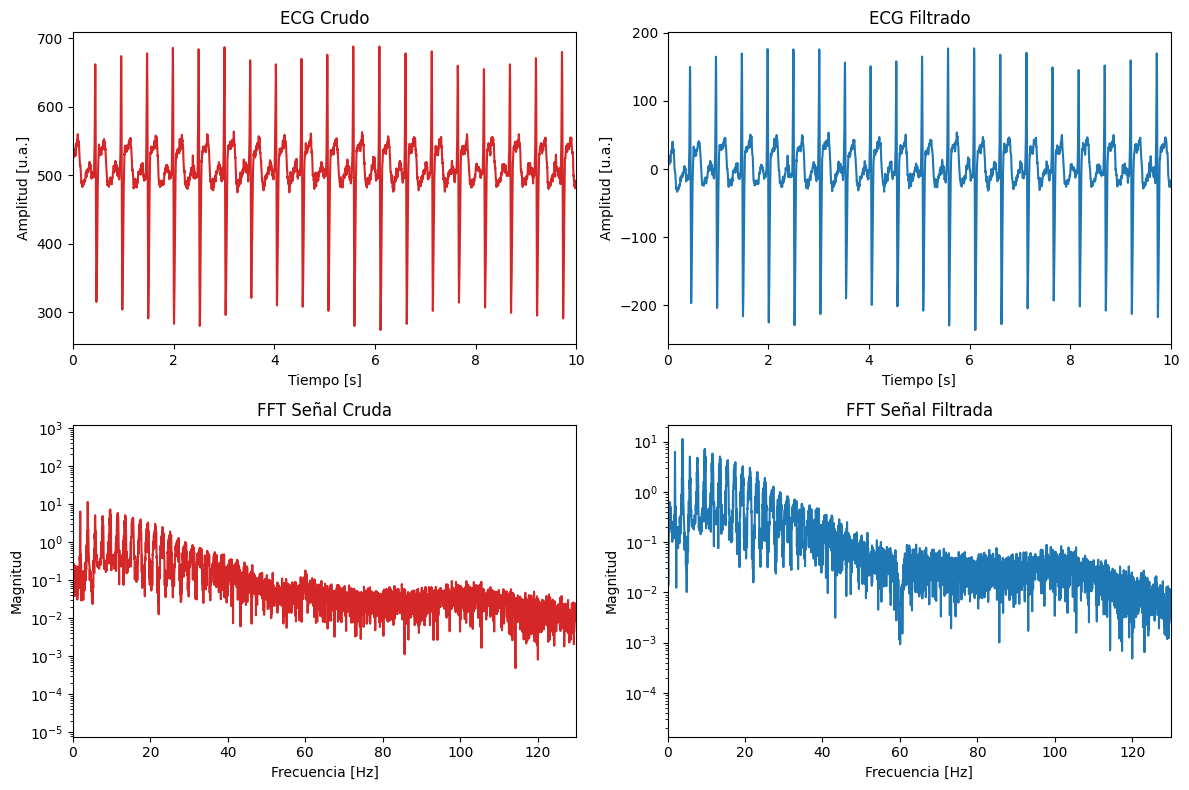

In [ ]:
# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, ecg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, ecg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

R-peaks detectados en 10s: 19
Frecuencia cardiaca estimada: 114 BPM


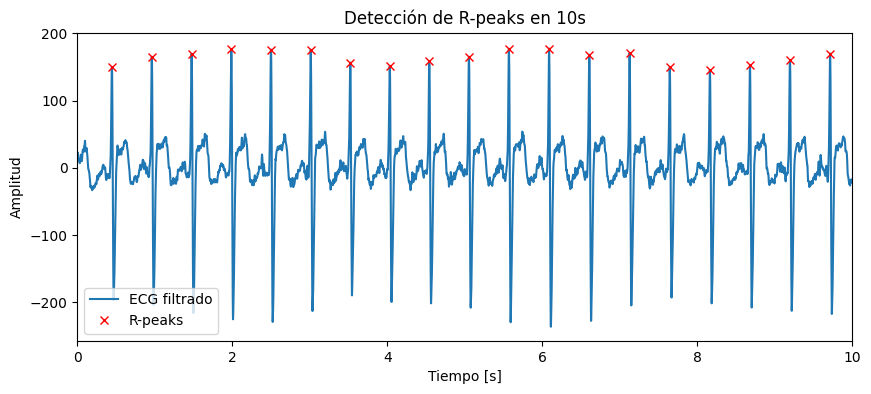

In [ ]:
# Detección de picos R + BPM

# Usamos find_peaks sobre señal filtrada
peaks, _ = signal.find_peaks(ecg_filtered, distance=fs*0.4, prominence=np.std(ecg_filtered)*0.5)

# Contar cuántos picos en primeros 10 segundos
mask_10s = (t[peaks] <= 10)
num_peaks_10s = np.sum(mask_10s)

bpm = num_peaks_10s * 6  # escalar a 60 segundos

print(f"R-peaks detectados en 10s: {num_peaks_10s}")
print(f"Frecuencia cardiaca estimada: {bpm} BPM")

# Plot de los picos detectados (solo 10s)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_filtered, label="ECG filtrado")
plt.plot(t[peaks], ecg_filtered[peaks], "rx", label="R-peaks")
plt.xlim(0,10)
plt.title("Detección de R-peaks en 10s")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Análisis ECG conteniendo la respiración

In [50]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab4\Basal Conteniendo la respiración 1.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
ecg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(ecg_raw)
t = np.arange(N) / fs

In [51]:
# Denoising / Filtrado

# a) Quitar DC (media)
ecg_dc = ecg_raw - np.mean(ecg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
ecg_notch = signal.filtfilt(b_notch, a_notch, ecg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
ecg_filtered = signal.filtfilt(b_band, a_band, ecg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(ecg_raw, fs)
freqs_filt, fft_filt = compute_fft(ecg_filtered, fs)

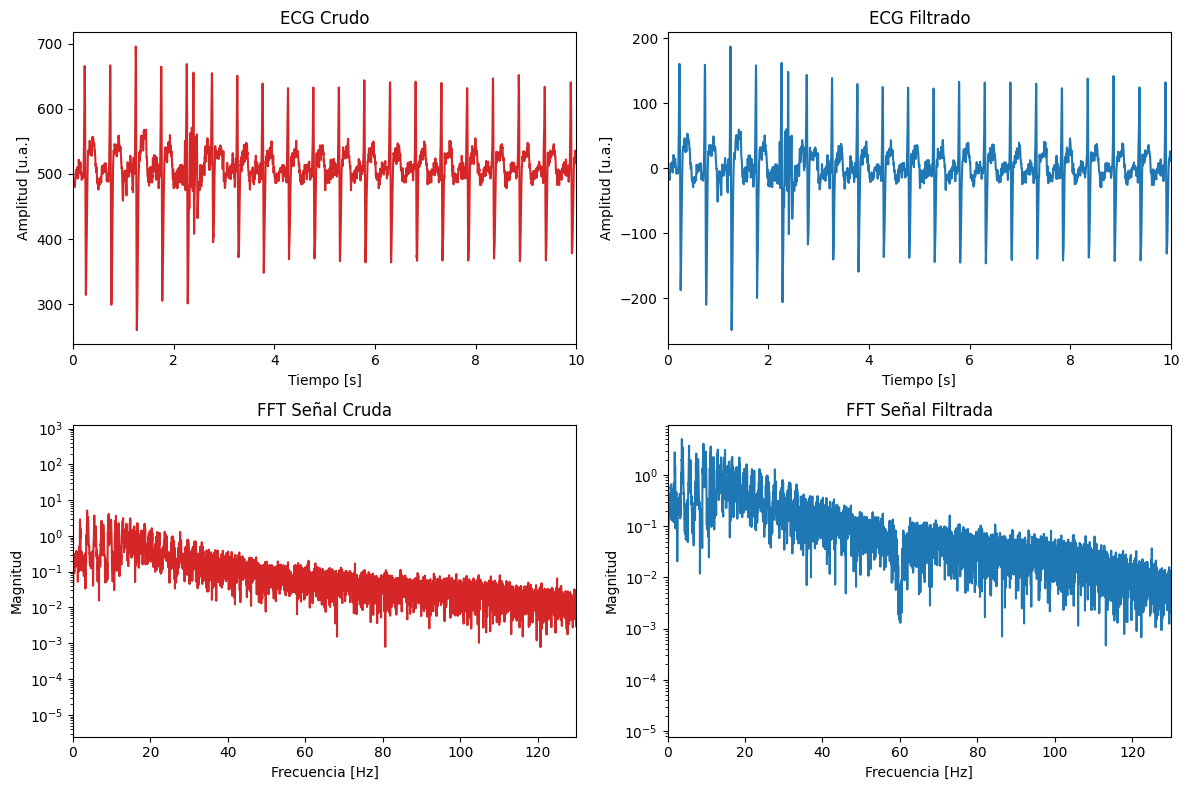

In [52]:
# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, ecg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, ecg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

R-peaks detectados en 10s: 20
Frecuencia cardiaca estimada: 120 BPM


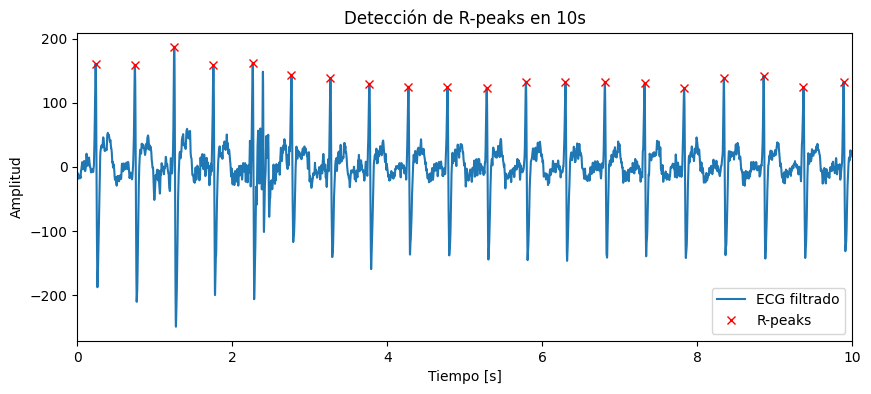

In [53]:
# Detección de picos R + BPM

# Usamos find_peaks sobre señal filtrada
peaks, _ = signal.find_peaks(ecg_filtered, distance=fs*0.4, prominence=np.std(ecg_filtered)*0.5)

# Contar cuántos picos en primeros 10 segundos
mask_10s = (t[peaks] <= 10)
num_peaks_10s = np.sum(mask_10s)

bpm = num_peaks_10s * 6  # escalar a 60 segundos

print(f"R-peaks detectados en 10s: {num_peaks_10s}")
print(f"Frecuencia cardiaca estimada: {bpm} BPM")

# Plot de los picos detectados (solo 10s)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_filtered, label="ECG filtrado")
plt.plot(t[peaks], ecg_filtered[peaks], "rx", label="R-peaks")
plt.xlim(0,10)
plt.title("Detección de R-peaks en 10s")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Análisis ECG agitado

In [55]:
# Cargar archivo
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\PUCP\ISB\Lab4\Agitado 1.txt",
                 sep="\t", comment="#", header=None)

df.columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "extra"]

# Extraer señal
ecg_raw = df["A1"].values
fs = 1000  # Hz Extraido de la documentación
N = len(ecg_raw)
t = np.arange(N) / fs

In [56]:
# Denoising / Filtrado

# a) Quitar DC (media)
ecg_dc = ecg_raw - np.mean(ecg_raw)

# b) Notch 60 Hz
notch_freq = 60.0
q = 30.0
b_notch, a_notch = signal.iirnotch(notch_freq, q, fs)
ecg_notch = signal.filtfilt(b_notch, a_notch, ecg_dc)

# c) Bandpass 0.5 - 130 Hz
lowcut = 0.5
highcut = 130.0
b_band, a_band = signal.butter(4, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
ecg_filtered = signal.filtfilt(b_band, a_band, ecg_notch)

# FFT cruda y filtrada

def compute_fft(sig, fs):
    n = len(sig)
    freqs = np.fft.rfftfreq(n, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / n
    return freqs, fft_vals

freqs_raw, fft_raw = compute_fft(ecg_raw, fs)
freqs_filt, fft_filt = compute_fft(ecg_filtered, fs)

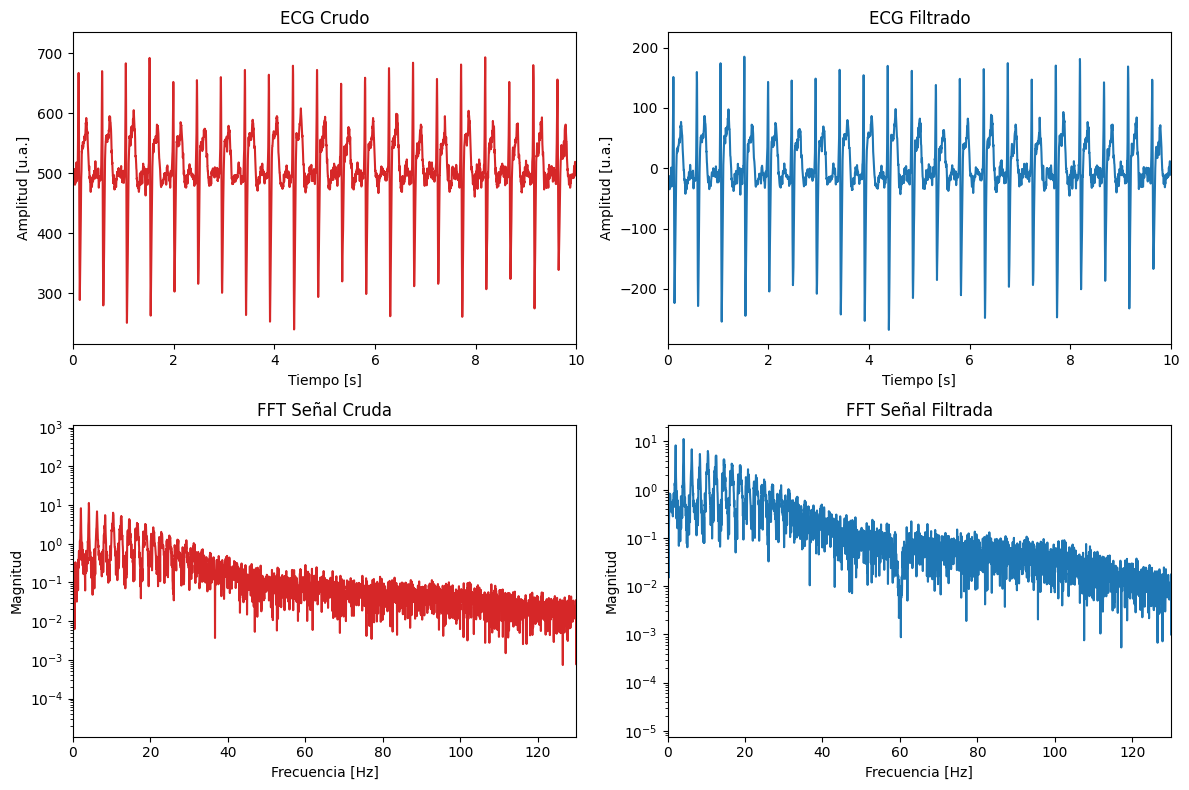

In [57]:
# Plots (2x2)

plt.figure(figsize=(12,8))

# Señal cruda
plt.subplot(2,2,1)
plt.plot(t, ecg_raw, color="tab:red")
plt.title("ECG Crudo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# Señal filtrada
plt.subplot(2,2,2)
plt.plot(t, ecg_filtered, color="tab:blue")
plt.title("ECG Filtrado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [u.a.]")
plt.xlim(0,10)

# FFT cruda
plt.subplot(2,2,3)
plt.semilogy(freqs_raw, fft_raw, color="tab:red")
plt.title("FFT Señal Cruda")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

# FFT filtrada
plt.subplot(2,2,4)
plt.semilogy(freqs_filt, fft_filt, color="tab:blue")
plt.title("FFT Señal Filtrada")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim(0,130)

plt.tight_layout()
plt.show()

R-peaks detectados en 10s: 21
Frecuencia cardiaca estimada: 126 BPM


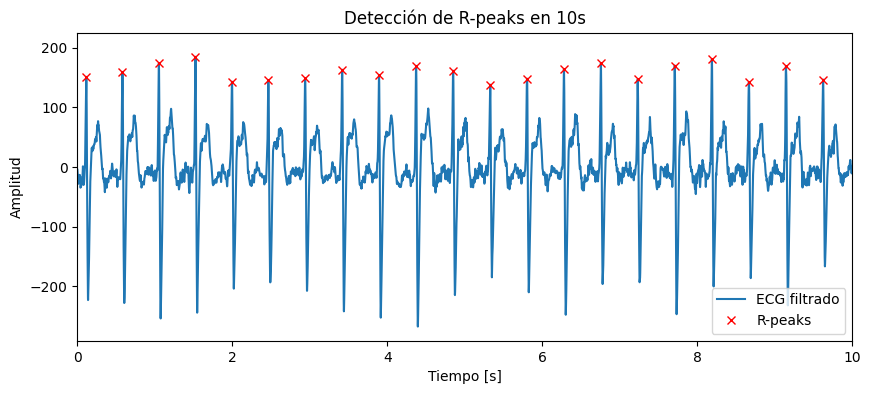

In [58]:
# Detección de picos R + BPM

# Usamos find_peaks sobre señal filtrada
peaks, _ = signal.find_peaks(ecg_filtered, distance=fs*0.4, prominence=np.std(ecg_filtered)*0.5)

# Contar cuántos picos en primeros 10 segundos
mask_10s = (t[peaks] <= 10)
num_peaks_10s = np.sum(mask_10s)

bpm = num_peaks_10s * 6  # escalar a 60 segundos

print(f"R-peaks detectados en 10s: {num_peaks_10s}")
print(f"Frecuencia cardiaca estimada: {bpm} BPM")

# Plot de los picos detectados (solo 10s)
plt.figure(figsize=(10,4))
plt.plot(t, ecg_filtered, label="ECG filtrado")
plt.plot(t[peaks], ecg_filtered[peaks], "rx", label="R-peaks")
plt.xlim(0,10)
plt.title("Detección de R-peaks en 10s")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.show()